In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iono = pd.read_csv("/content/drive/MyDrive/ml/19-12-22/datasets/isodata123.csv")

In [ ]:
iono

,A,B,C,D,E,F,G,H,I,J,...,WK,WL,WM,WN,WO,WP,WQ,WR,WS,WT
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,-0.5742,0.1050,0.4936,0.3986,-0.2058,-0.4130,-0.4188,-0.5194,-0.5080,-0.4878,...,0.5000,0.6800,0.8200,0.8400,0.8400,0.7400,0.8200,0.6400,0.3200,22
6234,-0.4520,0.0154,0.5078,0.8978,0.7956,0.4366,0.2352,0.1300,0.0682,0.3004,...,0.5000,0.2250,0.7500,0.8750,0.6750,0.6000,0.4500,-0.1250,-0.2250,23
6235,-0.5824,-0.1646,0.1406,0.6224,0.6626,0.3172,0.0924,0.0120,-0.1646,-0.1326,...,0.8068,0.7392,0.7392,0.6908,0.7294,0.7004,0.6812,0.5170,0.3430,24
6236,0.0160,0.8168,1.0000,0.7814,0.4084,0.2122,-0.2218,-0.6848,-0.8424,-0.7588,...,0.0344,0.0344,-0.0344,0.4252,0.2874,-0.0114,0.1034,-0.1954,-0.8620,25


In [ ]:
labels = np.array(iono)[:,-1]
k=len(set(labels))
k

26

In [ ]:
ionoarr= np.array(iono)[:,:-1]
ionoarr

array([[-0.4394, -0.093 ,  0.1718, ...,  0.641 ,  0.5898, -0.4872],
       [-0.4348, -0.1198,  0.2474, ...,  0.4318,  0.4546, -0.091 ],
       [-0.233 ,  0.2124,  0.5014, ...,  0.254 ,  0.1588, -0.4762],
       ...,
       [-0.5824, -0.1646,  0.1406, ...,  0.6812,  0.517 ,  0.343 ],
       [ 0.016 ,  0.8168,  1.    , ...,  0.1034, -0.1954, -0.862 ],
       [-0.6116, -0.104 ,  0.2566, ..., -0.0536,  0.0714, -0.0892]])

In [ ]:
def kmean(a):
  b=np.sort(a)
  cluster=[]
  med=[]
  alt=0
  for i in range(2,k+1):
    alt=alt+1
    med.append(np.percentile(a,100*1*alt/k))
  med.sort()
  x=0
  y=0
  for j in range(len(b)):
    if(b[j]>med[x]):
      cluster.append(b[y:j])
      y=j
      x=x+1
      if(x>k-2):
        break
  cluster.append(b[y:])
  centroid=[0 for i in range(k)]
  sse=0
  for i in range(len(cluster)):
    centroid[i]=np.median(cluster[i])
    #print(np.sum(np.absolute((centroid[i]-cluster[i])**2)))
    sse=sse+np.sum((centroid[i]-cluster[i])**2)
  #print(sse)
  #print(centroid)
  #print(cluster)
  return sse/k
l=[]
sseval=[]
for i in range(len(ionoarr[0])):
  if(len(set(ionoarr[:,i]))<5):
    l.append([np.NaN,i])
  else:
    sseval.append(kmean(ionoarr[:,i]))
    l.append([kmean(ionoarr[:,i]),i])
l.sort()
print(l)
print(len(l))
threshold = (np.nanmin(sseval)+np.nanmax(sseval))/2
threshold
threshlist=[]#removed null values from list
for i in range(len(l)):
  if(l[i][0]==np.NaN):
    continue
  else:
    if(l[i][0]<len(l)):
      threshlist.append(l[i])
print(threshlist)
sixtyper=[]
ans=[]
for i in range(int(len(threshlist)*0.6)):
  sixtyper.append(threshlist[i])

  ans.append(threshlist[i][0])
sixtyper.sort()
print(sixtyper)
print(len(sixtyper))

[[0.11647211999999997, 519], [0.11741363692307692, 518], [0.1190224846153846, 551], [0.12179275692307694, 557], [0.12426711076923078, 550], [0.13501702384615386, 555], [0.13744747384615386, 552], [0.13882784230769232, 546], [0.13989966384615382, 556], [0.14084248615384615, 568], [0.14204489538461537, 567], [0.1428063261538461, 549], [0.14455949000000004, 547], [0.14550906307692305, 565], [0.14638716230769228, 566], [0.14677492076923082, 563], [0.14700358615384615, 554], [0.1470681192307692, 572], [0.14769999230769232, 560], [0.14874841, 570], [0.1494658061538462, 559], [0.15201610461538456, 571], [0.1524934453846154, 573], [0.1540811661538461, 561], [0.1556915461538462, 553], [0.1556987615384615, 558], [0.15786057692307695, 569], [0.1586239123076923, 548], [0.16928011692307693, 575], [0.16933322461538453, 564], [0.17486263846153852, 562], [0.18080461076923077, 574], [0.22979067, 576], [nan, 577], [nan, 578], [nan, 579], [0.5193077169230769, 583], [0.8769230769230769, 581], [0.941538461

In [ ]:
xy=pd.DataFrame()
for i in sixtyper:
  xy[iono.columns[i[1]]]=iono[iono.columns[i[1]]]
xy

<ipython-input-12-b997e8ca307e>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xy[iono.columns[i[1]]]=iono[iono.columns[i[1]]]


,VU,SZ,SY,UF,UL,G,MA,UE,VZ,VV,...,KU,LB,KF,QQ,HT,VE,VL,VJ,VK,VI
0,0.7436,-0.1864,-0.1706,-0.4030,0.7858,0.3578,0.5100,-0.3826,1.0000,0.5128,...,-0.3164,0.8228,0.2912,1.0000,0.3778,-0.8910,0.1334,-1.0,-1.0,-1.0
1,0.6590,0.2378,0.2378,0.1330,0.6648,0.4948,0.8488,0.0924,0.4772,0.4090,...,-0.0666,0.8666,0.7334,1.0000,0.4000,-0.9630,-1.0000,-1.0,-1.0,-1.0
2,0.0634,0.4048,0.2620,0.0408,0.5918,-0.7168,0.3652,-0.0408,0.5080,0.1112,...,-0.0196,0.8628,0.3334,-0.3938,0.3846,0.9424,-0.8334,-1.0,-0.6,-0.8
3,0.3956,0.8902,0.6484,0.2150,0.7758,-0.6868,0.2666,0.2710,0.9136,0.4100,...,-0.7174,0.9566,0.0434,-0.2712,0.1282,1.0000,-0.8334,-1.0,-1.0,-1.0
4,0.2500,-0.3474,-0.4016,-0.6044,0.1382,-0.4324,0.4090,-0.5264,0.5938,0.5312,...,-0.1650,0.9806,0.5340,-0.0172,0.5136,-0.9096,1.0000,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,0.5400,-0.0334,-0.1166,0.2086,0.3942,-0.4188,-0.2926,0.1020,0.4800,1.0000,...,0.3684,0.8948,-0.0316,-0.0092,0.0000,-0.9748,0.9334,-1.0,-1.0,1.0
6234,0.5000,0.4234,0.3154,0.6094,0.7500,0.2352,-0.1314,0.4062,0.6750,0.4750,...,0.1384,0.2616,0.6000,0.9834,0.4286,1.0000,-0.7666,-1.0,-1.0,-1.0
6235,0.0628,0.9692,0.7230,0.8642,0.7466,0.0924,0.7140,0.5294,0.1208,0.0242,...,0.7030,0.4456,0.4852,1.0000,0.6280,-0.9972,-1.0000,-1.0,-1.0,-1.0
6236,0.5632,0.1268,0.2394,0.6000,0.5556,-0.2218,-0.0010,0.1778,0.0804,0.8390,...,-0.5692,0.3230,0.7846,0.0530,0.7500,-0.8212,-1.0000,-1.0,-1.0,-1.0


In [ ]:
correlation_frame=xy.corr()
correlation_frame

,VU,SZ,SY,UF,UL,G,MA,UE,VZ,VV,...,KU,LB,KF,QQ,HT,VE,VL,VJ,VK,VI
VU,1.000000,-0.020836,0.023613,-0.015860,-0.034436,0.069918,-0.163000,0.036876,0.049254,0.644262,...,-0.097460,-0.205565,0.062959,0.021888,-0.013879,-0.043522,-0.024759,-0.002765,-0.090059,0.006228
SZ,-0.020836,1.000000,0.820333,0.768411,0.053579,0.232634,0.135565,0.684807,-0.172562,-0.049485,...,0.060051,-0.191776,-0.064286,0.282966,0.073846,-0.132419,-0.549725,-0.037267,-0.047908,-0.270717
SY,0.023613,0.820333,1.000000,0.635607,-0.015157,0.357238,0.164383,0.778382,-0.160408,-0.020998,...,0.001322,-0.246529,-0.058838,0.350722,0.060227,-0.202302,-0.576970,-0.041315,-0.047781,-0.264349
UF,-0.015860,0.768411,0.635607,1.000000,0.149582,0.188811,0.099027,0.799519,-0.192142,-0.020485,...,0.157360,-0.173387,-0.042515,0.290614,0.056431,-0.055034,-0.401788,-0.052056,-0.063277,-0.165062
UL,-0.034436,0.053579,-0.015157,0.149582,1.000000,-0.136701,-0.004183,0.075850,0.029621,-0.032178,...,0.076270,0.195175,0.048726,-0.071934,-0.156330,0.202218,-0.116901,-0.087481,-0.008476,-0.155011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VE,-0.043522,-0.132419,-0.202302,-0.055034,0.202218,0.032269,0.028776,-0.102242,0.029068,-0.051084,...,-0.069014,0.012564,0.047809,0.005927,-0.087230,1.000000,-0.037597,-0.138723,0.006994,-0.139230
VL,-0.024759,-0.549725,-0.576970,-0.401788,-0.116901,-0.372044,-0.200396,-0.474883,0.114910,0.082061,...,0.106308,0.198009,0.053213,-0.357915,-0.038198,-0.037597,1.000000,0.004581,0.039200,0.467098
VJ,-0.002765,-0.037267,-0.041315,-0.052056,-0.087481,-0.150410,-0.105016,-0.077011,0.088056,0.022044,...,-0.017872,0.121284,-0.024811,-0.201192,0.065490,-0.138723,0.004581,1.000000,0.097259,0.303027
VK,-0.090059,-0.047908,-0.047781,-0.063277,-0.008476,-0.025750,-0.066158,-0.056736,0.106853,-0.023680,...,-0.026882,0.078244,-0.006944,-0.057449,0.076161,0.006994,0.039200,0.097259,1.000000,0.055764


In [ ]:
for i in range(len(correlation_frame)):
  for j in range(len(correlation_frame)):
    if(correlation_frame.iloc[i,j]<-0.8 or correlation_frame.iloc[i,j]>0.8):
      correlation_frame.iloc[i,j]=None
correlation_frame

,VU,SZ,SY,UF,UL,G,MA,UE,VZ,VV,...,KU,LB,KF,QQ,HT,VE,VL,VJ,VK,VI
VU,NaN,-0.020836,0.023613,-0.015860,-0.034436,0.069918,-0.163000,0.036876,0.049254,0.644262,...,-0.097460,-0.205565,0.062959,0.021888,-0.013879,-0.043522,-0.024759,-0.002765,-0.090059,0.006228
SZ,-0.020836,NaN,NaN,0.768411,0.053579,0.232634,0.135565,0.684807,-0.172562,-0.049485,...,0.060051,-0.191776,-0.064286,0.282966,0.073846,-0.132419,-0.549725,-0.037267,-0.047908,-0.270717
SY,0.023613,NaN,NaN,0.635607,-0.015157,0.357238,0.164383,0.778382,-0.160408,-0.020998,...,0.001322,-0.246529,-0.058838,0.350722,0.060227,-0.202302,-0.576970,-0.041315,-0.047781,-0.264349
UF,-0.015860,0.768411,0.635607,NaN,0.149582,0.188811,0.099027,0.799519,-0.192142,-0.020485,...,0.157360,-0.173387,-0.042515,0.290614,0.056431,-0.055034,-0.401788,-0.052056,-0.063277,-0.165062
UL,-0.034436,0.053579,-0.015157,0.149582,NaN,-0.136701,-0.004183,0.075850,0.029621,-0.032178,...,0.076270,0.195175,0.048726,-0.071934,-0.156330,0.202218,-0.116901,-0.087481,-0.008476,-0.155011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VE,-0.043522,-0.132419,-0.202302,-0.055034,0.202218,0.032269,0.028776,-0.102242,0.029068,-0.051084,...,-0.069014,0.012564,0.047809,0.005927,-0.087230,NaN,-0.037597,-0.138723,0.006994,-0.139230
VL,-0.024759,-0.549725,-0.576970,-0.401788,-0.116901,-0.372044,-0.200396,-0.474883,0.114910,0.082061,...,0.106308,0.198009,0.053213,-0.357915,-0.038198,-0.037597,NaN,0.004581,0.039200,0.467098
VJ,-0.002765,-0.037267,-0.041315,-0.052056,-0.087481,-0.150410,-0.105016,-0.077011,0.088056,0.022044,...,-0.017872,0.121284,-0.024811,-0.201192,0.065490,-0.138723,0.004581,NaN,0.097259,0.303027
VK,-0.090059,-0.047908,-0.047781,-0.063277,-0.008476,-0.025750,-0.066158,-0.056736,0.106853,-0.023680,...,-0.026882,0.078244,-0.006944,-0.057449,0.076161,0.006994,0.039200,0.097259,NaN,0.055764


In [ ]:
len(correlation_frame)

367

In [ ]:
drop=[]
for i in range(len(correlation_frame)):
  l=np.array(correlation_frame[correlation_frame.columns[i:i+1]])
  if(np.count_nonzero(np.isnan(l))>5):
    drop.append(correlation_frame.columns[i:i+1][0])
len(drop)

133

In [ ]:
correlation_frame.drop(drop,axis=1)

,VU,SZ,SY,UF,UL,MA,UE,VZ,VV,WO,...,FG,KU,LB,KF,HT,VE,VL,VJ,VK,VI
VU,NaN,-0.020836,0.023613,-0.015860,-0.034436,-0.163000,0.036876,0.049254,0.644262,-0.114775,...,0.092423,-0.097460,-0.205565,0.062959,-0.013879,-0.043522,-0.024759,-0.002765,-0.090059,0.006228
SZ,-0.020836,NaN,NaN,0.768411,0.053579,0.135565,0.684807,-0.172562,-0.049485,0.167173,...,-0.205459,0.060051,-0.191776,-0.064286,0.073846,-0.132419,-0.549725,-0.037267,-0.047908,-0.270717
SY,0.023613,NaN,NaN,0.635607,-0.015157,0.164383,0.778382,-0.160408,-0.020998,0.117926,...,-0.236751,0.001322,-0.246529,-0.058838,0.060227,-0.202302,-0.576970,-0.041315,-0.047781,-0.264349
UF,-0.015860,0.768411,0.635607,NaN,0.149582,0.099027,0.799519,-0.192142,-0.020485,0.193205,...,-0.179333,0.157360,-0.173387,-0.042515,0.056431,-0.055034,-0.401788,-0.052056,-0.063277,-0.165062
UL,-0.034436,0.053579,-0.015157,0.149582,NaN,-0.004183,0.075850,0.029621,-0.032178,0.033933,...,0.109087,0.076270,0.195175,0.048726,-0.156330,0.202218,-0.116901,-0.087481,-0.008476,-0.155011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VE,-0.043522,-0.132419,-0.202302,-0.055034,0.202218,0.028776,-0.102242,0.029068,-0.051084,0.016033,...,0.093450,-0.069014,0.012564,0.047809,-0.087230,NaN,-0.037597,-0.138723,0.006994,-0.139230
VL,-0.024759,-0.549725,-0.576970,-0.401788,-0.116901,-0.200396,-0.474883,0.114910,0.082061,-0.118239,...,0.195566,0.106308,0.198009,0.053213,-0.038198,-0.037597,NaN,0.004581,0.039200,0.467098
VJ,-0.002765,-0.037267,-0.041315,-0.052056,-0.087481,-0.105016,-0.077011,0.088056,0.022044,-0.044149,...,0.051000,-0.017872,0.121284,-0.024811,0.065490,-0.138723,0.004581,NaN,0.097259,0.303027
VK,-0.090059,-0.047908,-0.047781,-0.063277,-0.008476,-0.066158,-0.056736,0.106853,-0.023680,-0.138040,...,0.044041,-0.026882,0.078244,-0.006944,0.076161,0.006994,0.039200,0.097259,NaN,0.055764


In [ ]:
eliminated=xy.drop(drop,axis=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
eliminated[eliminated.columns[0:len(eliminated.columns)]]

,VU,SZ,SY,UF,UL,MA,UE,VZ,VV,WO,...,FG,KU,LB,KF,HT,VE,VL,VJ,VK,VI
0,0.7436,-0.1864,-0.1706,-0.4030,0.7858,0.5100,-0.3826,1.0000,0.5128,0.5898,...,0.3812,-0.3164,0.8228,0.2912,0.3778,-0.8910,0.1334,-1.0,-1.0,-1.0
1,0.6590,0.2378,0.2378,0.1330,0.6648,0.8488,0.0924,0.4772,0.4090,0.0454,...,0.3946,-0.0666,0.8666,0.7334,0.4000,-0.9630,-1.0000,-1.0,-1.0,-1.0
2,0.0634,0.4048,0.2620,0.0408,0.5918,0.3652,-0.0408,0.5080,0.1112,-0.0476,...,0.3542,-0.0196,0.8628,0.3334,0.3846,0.9424,-0.8334,-1.0,-0.6,-0.8
3,0.3956,0.8902,0.6484,0.2150,0.7758,0.2666,0.2710,0.9136,0.4100,0.2950,...,0.2206,-0.7174,0.9566,0.0434,0.1282,1.0000,-0.8334,-1.0,-1.0,-1.0
4,0.2500,-0.3474,-0.4016,-0.6044,0.1382,0.4090,-0.5264,0.5938,0.5312,0.1562,...,0.4924,-0.1650,0.9806,0.5340,0.5136,-0.9096,1.0000,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,0.5400,-0.0334,-0.1166,0.2086,0.3942,-0.2926,0.1020,0.4800,1.0000,0.8400,...,-0.1098,0.3684,0.8948,-0.0316,0.0000,-0.9748,0.9334,-1.0,-1.0,1.0
6234,0.5000,0.4234,0.3154,0.6094,0.7500,-0.1314,0.4062,0.6750,0.4750,0.6750,...,0.6538,0.1384,0.2616,0.6000,0.4286,1.0000,-0.7666,-1.0,-1.0,-1.0
6235,0.0628,0.9692,0.7230,0.8642,0.7466,0.7140,0.5294,0.1208,0.0242,0.7294,...,-0.0884,0.7030,0.4456,0.4852,0.6280,-0.9972,-1.0000,-1.0,-1.0,-1.0
6236,0.5632,0.1268,0.2394,0.6000,0.5556,-0.0010,0.1778,0.0804,0.8390,0.2874,...,0.1486,-0.5692,0.3230,0.7846,0.7500,-0.8212,-1.0000,-1.0,-1.0,-1.0


In [ ]:
clf.fit(eliminated[eliminated.columns[0:len(eliminated.columns)]],labels)

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
accur=[]
for i in range(1,len(eliminated.columns)):  
  X_train, X_test, y_train, y_test = train_test_split(eliminated[eliminated.columns[0:i]],labels , test_size=0.4, random_state=1)
  
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %) for",i+1,"features", metrics.accuracy_score(y_test, y_pred)*100)
  accur.append([metrics.accuracy_score(y_test, y_pred)*100,str(i)+"features",[eliminated.columns[j:j+1][0] for j in range(i+1)]])
print(accur)
print(len(accur))

Gaussian Naive Bayes model accuracy(in %) for 2 features 9.935897435897436
Gaussian Naive Bayes model accuracy(in %) for 3 features 16.266025641025642
Gaussian Naive Bayes model accuracy(in %) for 4 features 18.469551282051285
Gaussian Naive Bayes model accuracy(in %) for 5 features 18.95032051282051
Gaussian Naive Bayes model accuracy(in %) for 6 features 23.317307692307693
Gaussian Naive Bayes model accuracy(in %) for 7 features 26.001602564102566
Gaussian Naive Bayes model accuracy(in %) for 8 features 26.883012820512818
Gaussian Naive Bayes model accuracy(in %) for 9 features 29.6875
Gaussian Naive Bayes model accuracy(in %) for 10 features 30.809294871794872
Gaussian Naive Bayes model accuracy(in %) for 11 features 33.21314102564102
Gaussian Naive Bayes model accuracy(in %) for 12 features 34.855769230769226
Gaussian Naive Bayes model accuracy(in %) for 13 features 35.57692307692308
Gaussian Naive Bayes model accuracy(in %) for 14 features 35.496794871794876
Gaussian Naive Bayes m

In [ ]:
from collections import Counter
import math
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = iono[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)
l=[]
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('A')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['A'] for dataframe in split_data]
        gain = information_gain(dataset['A'], split_labels)
        l.append([gain,iono.columns.get_loc(feature)])
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(iono, find_best_split(iono)[0]) # contains a list of dataframes after splitting
print(l)
l.sort()

NH 10.748582114648146
[[10.479529023986407, 1], [10.38337754182201, 2], [10.188963251886218, 3], [10.475455585605772, 4], [10.522011230041729, 5], [10.638755205446273, 6], [10.718062944088933, 7], [10.660522004106165, 8], [10.674360646651765, 9], [10.647067088114097, 10], [10.685011237153532, 11], [10.65410818870541, 12], [10.627394694177658, 13], [10.49042784242322, 14], [10.386397721031662, 15], [10.372273209194844, 16], [10.329452155468907, 17], [10.22788005406709, 18], [10.003292063215497, 19], [9.867862639789292, 20], [10.01287950078895, 21], [10.137700309360687, 22], [10.189598945794554, 23], [10.25373617943945, 24], [10.26417372591645, 25], [10.337737828552935, 26], [10.408081268548331, 27], [10.441370737222332, 28], [10.540547320440492, 29], [10.599139990794196, 30], [10.582765806825213, 31], [10.136735293534002, 32], [10.38244630348877, 33], [10.396713446104467, 34], [10.277406814444843, 35], [10.480238330840747, 36], [10.454026925393295, 37], [10.573159623905651, 38], [10.638

In [ ]:
l.sort()
l.reverse()
print(l)

[[10.748582114648146, 371], [10.74577537319375, 370], [10.732213916303571, 189], [10.730278569630318, 190], [10.72675001833443, 221], [10.725339395277766, 223], [10.721145317321572, 43], [10.71905377548819, 75], [10.718062944088933, 7], [10.717614001035253, 191], [10.716449567926826, 41], [10.712120128254343, 74], [10.710974750503315, 168], [10.710635597384917, 42], [10.710164431061058, 105], [10.708263106945154, 222], [10.703494745028754, 136], [10.695654385602381, 137], [10.69551720246318, 159], [10.695044284085405, 158], [10.691988398748144, 138], [10.691089916941623, 107], [10.690198703533863, 106], [10.689656890993145, 219], [10.68776385489635, 220], [10.685011237153532, 11], [10.684956368787478, 369], [10.682308829326528, 73], [10.679776353578482, 44], [10.674360646651765, 9], [10.673640218766474, 169], [10.673356707446402, 94], [10.672670213481165, 364], [10.670827742676737, 127], [10.667262615928957, 338], [10.665943956729416, 126], [10.664300575918382, 218], [10.66240787853948

In [ ]:
xyz=pd.DataFrame()
for i in l:
  xyz[iono[iono.columns[i[1]:i[1]+1]].columns[0]]=iono[iono.columns[i[1]:i[1]+1]]
xyz

<ipython-input-27-a2dcde4b7c9f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xyz[iono[iono.columns[i[1]:i[1]+1]].columns[0]]=iono[iono.columns[i[1]:i[1]+1]]


,NH,NG,GH,GI,HN,HP,AR,BX,H,GJ,...,NW,QJ,VI,PE,PD,VJ,VH,VF,VG,VM
0,0.1226,0.3152,0.1258,0.0734,-0.3810,-0.1862,-0.3428,-0.4028,0.0478,-0.0874,...,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0,-1,-1,1,-1
1,-0.1322,0.0006,0.4488,0.3524,0.1596,0.3830,-0.2290,-0.3584,0.0338,0.3734,...,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0,-1,1,-1,-1
2,0.3128,0.7180,0.8474,0.6730,0.6810,0.4266,-0.6462,-0.7036,-0.6342,0.5886,...,-1.00,-1.0000,-0.8,-1.0000,-1.0000,-1.0,1,-1,-1,-1
3,0.2560,0.7734,0.7892,0.5956,0.4760,0.3136,-0.7452,-0.7474,-0.6650,0.4584,...,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0,1,-1,-1,-1
4,0.1106,0.2362,0.6328,0.4792,0.0756,-0.0644,-0.5290,-0.6968,-0.4358,0.4224,...,1.00,-1.0000,-1.0,-0.8572,-0.9142,-1.0,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,-0.0006,0.1140,0.8366,0.7440,0.6946,0.3086,-0.3450,-0.4856,-0.5194,0.5000,...,-1.00,-1.0000,1.0,-1.0000,-1.0000,-1.0,-1,-1,1,-1
6234,-0.2516,-0.4572,0.2962,-0.0158,0.1552,-0.5274,0.5606,0.7278,0.1300,-0.3304,...,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0,1,-1,-1,-1
6235,0.6442,0.7798,0.3846,0.3334,0.2024,0.2898,0.0846,0.2628,0.0120,0.2136,...,-1.00,-0.9714,-1.0,-1.0000,-1.0000,-1.0,-1,1,-1,1
6236,0.6630,0.7488,1.0000,0.9020,0.6480,0.6202,-0.8652,-0.2876,-0.6848,0.6644,...,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0,-1,1,-1,-1


In [ ]:
accur1=[]
for i in range(2,616):  
  X_train, X_test, y_train, y_test = train_test_split(xyz[xyz.columns[0:i]],labels , test_size=0.4, random_state=1)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur1.append([metrics.accuracy_score(y_test, y_pred)*100,str(i)+"features",[xyz.columns[j:j+1][0] for j in range(i+1)]])
print(accur1)

Gaussian Naive Bayes model accuracy(in %): 9.014423076923077
Gaussian Naive Bayes model accuracy(in %): 12.94070512820513
Gaussian Naive Bayes model accuracy(in %): 13.181089743589745
Gaussian Naive Bayes model accuracy(in %): 13.862179487179487
Gaussian Naive Bayes model accuracy(in %): 13.62179487179487
Gaussian Naive Bayes model accuracy(in %): 22.47596153846154
Gaussian Naive Bayes model accuracy(in %): 25.761217948717945
Gaussian Naive Bayes model accuracy(in %): 33.37339743589743
Gaussian Naive Bayes model accuracy(in %): 32.49198717948718
Gaussian Naive Bayes model accuracy(in %): 33.37339743589743
Gaussian Naive Bayes model accuracy(in %): 34.49519230769231
Gaussian Naive Bayes model accuracy(in %): 38.74198717948718
Gaussian Naive Bayes model accuracy(in %): 37.70032051282051
Gaussian Naive Bayes model accuracy(in %): 38.74198717948718
Gaussian Naive Bayes model accuracy(in %): 39.18269230769231
Gaussian Naive Bayes model accuracy(in %): 39.22275641025641
Gaussian Naive Bayes 

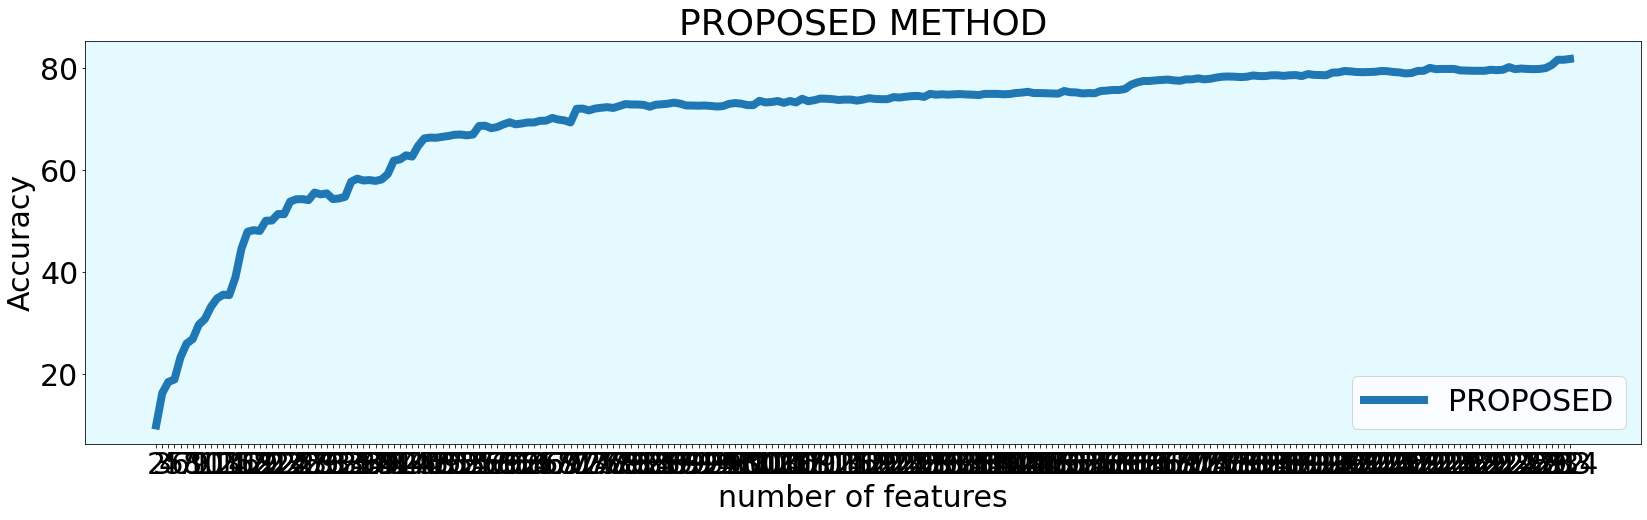

In [ ]:
import matplotlib
plt.rcParams['figure.figsize'] = [27, 7]
matplotlib.rcParams['font.family'] = 'Comic Sans MS'
plt.rc('font', size=30) 
y1=[accur[i][0] for i in range(len(accur))]
x1=[len(accur[i][2]) for i in range(len(accur))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("PROPOSED METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur[i][2]) for i in range(len(accur))])
ax.set_xticklabels([str(len(accur[i][2])) for i in range(len(accur))])
plt.legend(loc='lower right', ncol=1)
plt.show()

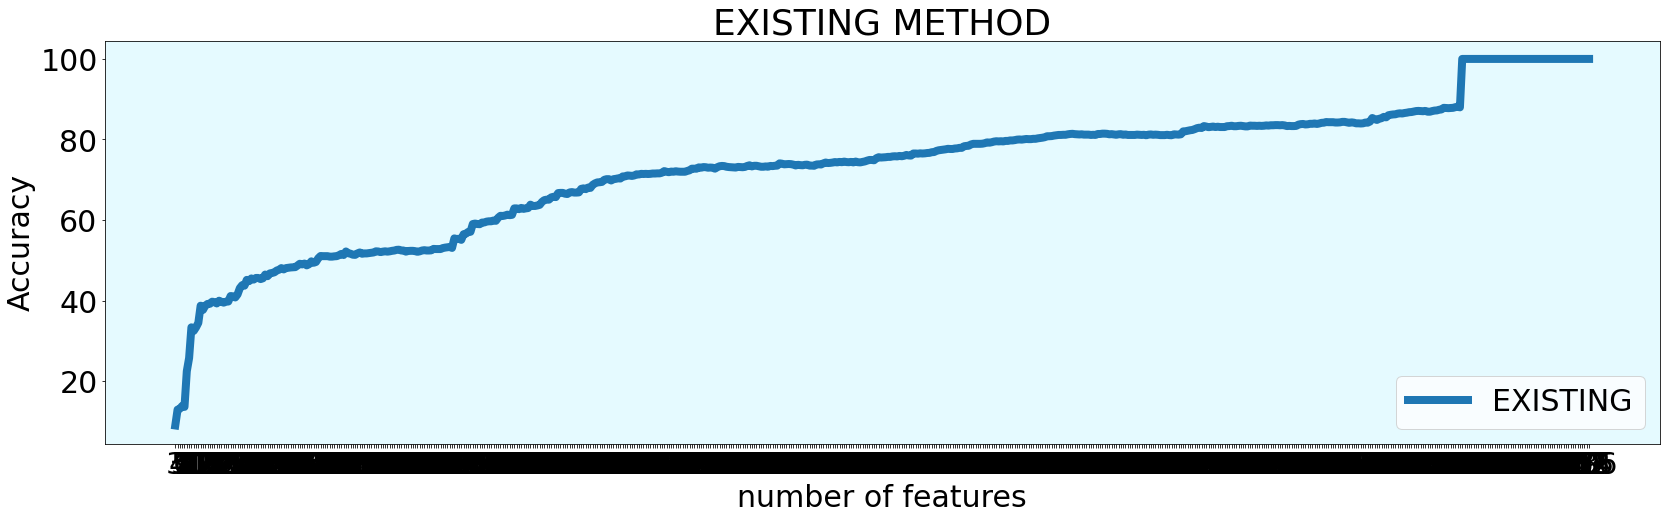

In [ ]:
y2=[accur1[i][0] for i in range(len(accur1))]
x2=[len(accur1[i][2]) for i in range(len(accur1))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()

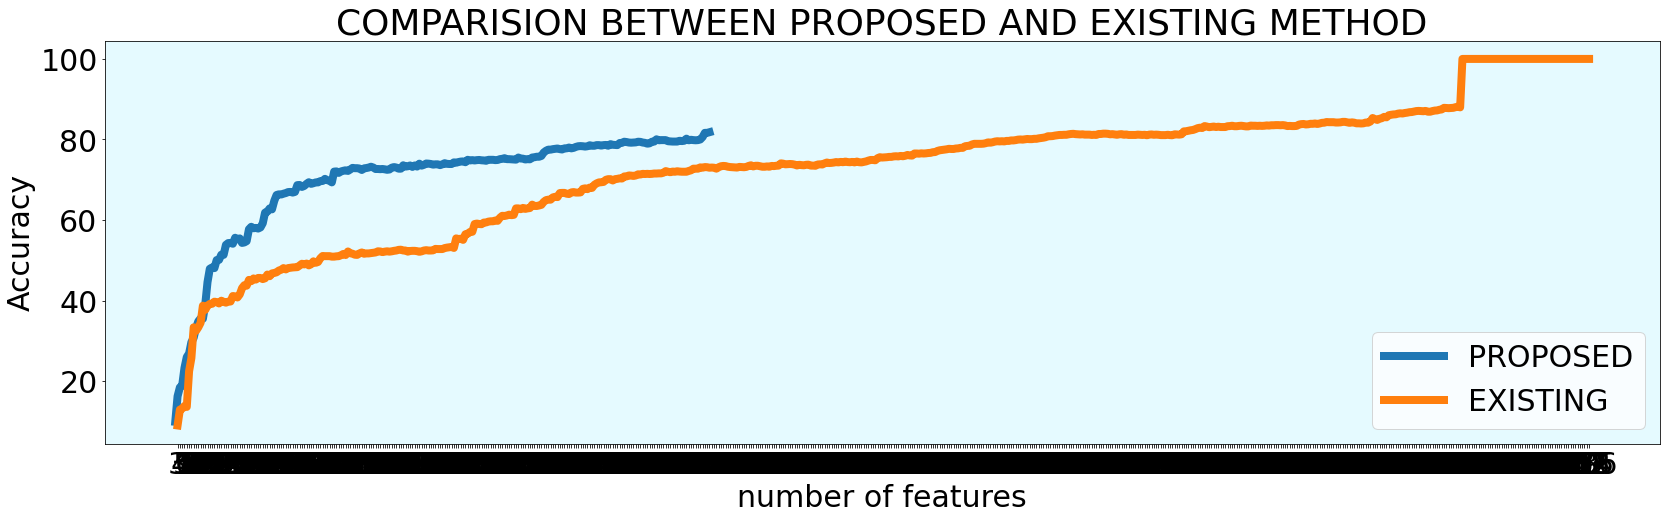

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("COMPARISION BETWEEN PROPOSED AND EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()